In [1]:
import numpy as np
from astropy.io import fits
import warnings
from scipy import optimize
# import muse_tools as mt
import matplotlib.pyplot as plt
from astropy.stats import gaussian_sigma_to_fwhm


def gauss2D(amp, x0, y0, xsig, ysig):
    return lambda x, y: amp * np.exp(-(((x0 - x)/xsig)**2 +
                                       ((y0 - y)/ysig)**2)/2)

def moments(data):
    total = np.abs(data).sum()
    Y, X = np.indices(data.shape)
    y = np.argmax((X * np.abs(data)).sum(axis = 1) / total)
    x = np.argmax((Y * np.abs(data)).sum(axis = 0) /total)
    col = data[int(y), :]
    row = data[:, int(x)]
    xwidth = np.sqrt(np.abs((np.arange(col.size) - y)*col).sum() / 
                     np.abs(col).sum())
    ywidth = np.sqrt(np.abs((np.arange(row.size) - x)*row).sum() /
                     np.abs(row).sum())
    height = data.max()
    mom = np.array([ywidth, xwidth])
    return height, y, x, ywidth, xwidth

def fitgauss(data):
    params = (moments(data))
    errorfunction = lambda p: np.ravel(gauss2D(*p)(*np.indices(data.shape)) - data)
    p, success = optimize.leastsq(errorfunction, x0 = params)
    return p

In [60]:
f = fits.open('data/HD163296_SIIF_6730.fits')[0]
data = f.data
hdr = f.header

In [54]:
mnts = moments(data)

In [55]:
mnts

(3.8383192125710213e-16, 104, 84, 9.755932565246006, 7.148536029179898)

In [78]:
p = fitgauss(data[140:241, 60:101])
fit = gauss2D(*p)
Y, X = np.indices(data[140:241, 60:101].shape)

In [64]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


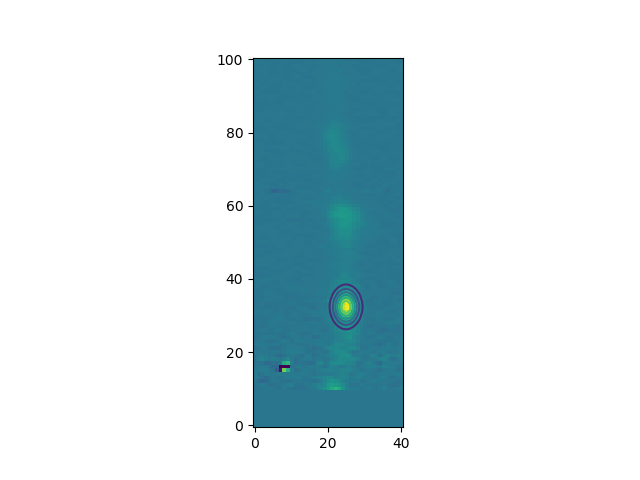

[3.52816464e-16 3.23795895e+01 2.49408304e+01 3.08250830e+00
 2.23585760e+00]


In [79]:
%matplotlib notebook

plt.imshow(data[140:241, 60:101], origin = 'lower')
plt.contour(fit(Y, X))
print(p)

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from telassar import PVSlice
import astropy.units as u
import numpy as np

pv = PVSlice(filename = 'data/HD163296_SIIF_6730.fits')

In [16]:
pv2 = pv.spectral_window(vmin = -400, vmax = 390, unit = u.Unit('km/s'))
#test = pv.spectral_window(vmin = 200, vmax = 300, unit = u.Unit('km/s'))

#pv2 = pv2.data * 1e16
#new_pv += np.abs(new_pv.min())
#new_pv.max()
pv2.world

WCS Keywords

Number of WCS axes: 2
CTYPE : 'OFFSET'  'VELO'  
CRVAL : -25.3  -395.354586567  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.2  6.68566370727  
NAXIS : 330  119

<IPython.core.display.Javascript object>


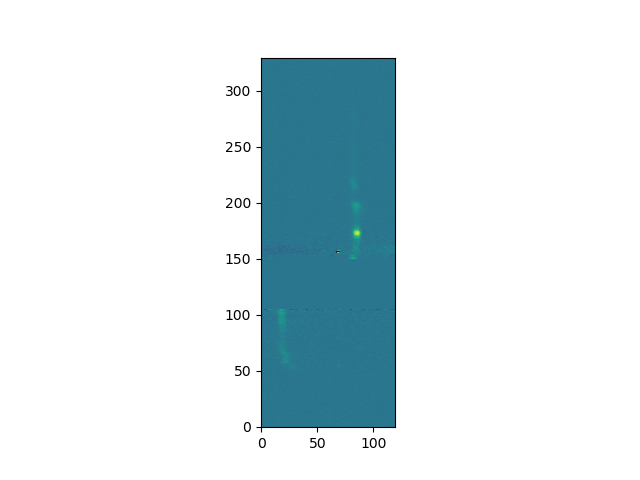

In [384]:
%matplotlib notebook

plt.imshow(bkgrd.background, origin = 'lower')
plt.imshow(pv2._data - bkgrd.background, origin = 'lower')

<IPython.core.display.Javascript object>


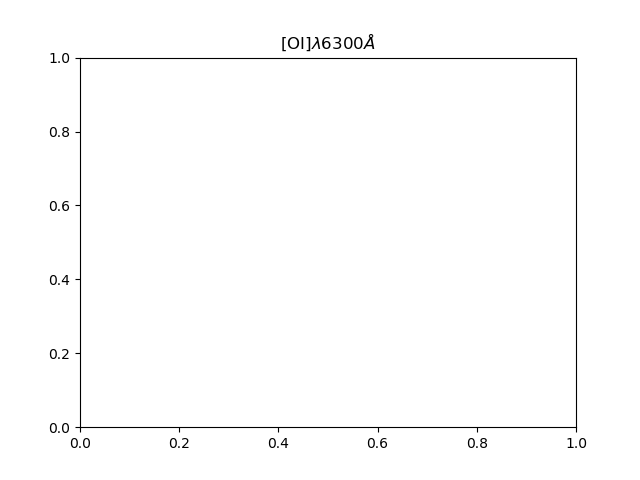

Text(0.5, 1.0, '$[\\mathrm{OI}]\\lambda 6300\\AA$')

In [172]:
lines = {
        'OI6300':   [6300.304, 'Angstrom', r'$[\mathrm{OI}]\lambda 6300\AA$'],
        'OI6363':   [6363.777, 'Angstrom', r'$[\mathrm{OI}]\lambda 6363\AA$'],
        'NII6548':  [6548.04, 'Angstrom', r'$[\mathrm{NII}]\lambda 6548\AA$'],
        'NII6583':  [6583.46,  'Angstrom', r'$[\mathrm{NII}]\lambda 6583\AA$'],
        'HAlpha':   [6562.8,  'Angstrom', r'$\mathrm{H}\alpha$'],
        'HBeta':    [4861.325,  'Angstrom', r'$\mathrm{H}\beta$'],
        'SII6716':  [6716.44,  'Angstrom', r'$[\mathrm{SII}]\lambda 6716\AA$'],
        'SII6731':  [6730.81,  'Angstrom', r'$[\mathrm{SII}]\lambda 6730\AA$'],
        'CaII7291': [7291.47, 'Angstrom', r'$[\mathrm{CaII}]\lambda 7291\AA$'],
        'CaII7324': [7323.89, 'Angstrom', r'$[\mathrm{CaII}]\lambda 7324\AA$']
}

emline = 'OI6300'

if emline in (lines.keys()):
    t = lines[emline][2]
    
fig = plt.figure()
plt.title(rf'{t}')

<IPython.core.display.Javascript object>


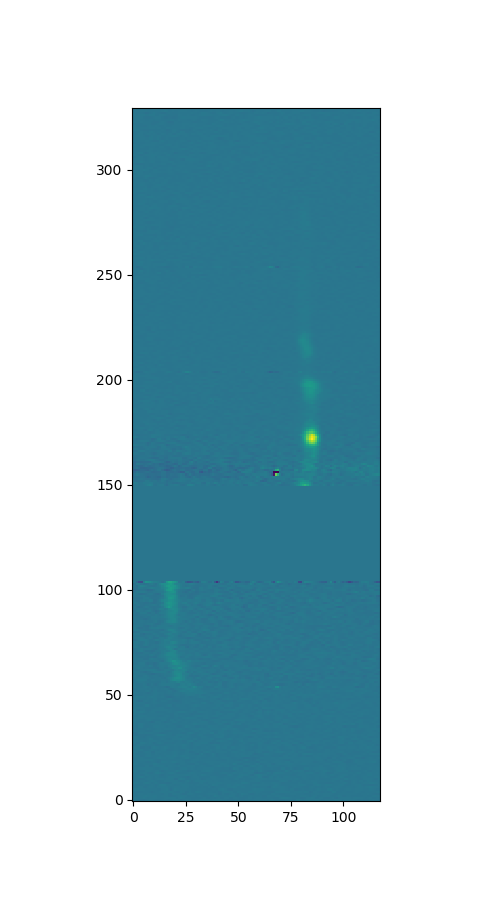

In [60]:
%matplotlib notebook
import matplotlib.pyplot as plt
from telassar.plotter import ImPlotter

data = pv2.data.copy()

fig, ax = plt.subplots(figsize = (5,9))
cax = ax.imshow(data, origin = 'lower', interpolation = 'nearest')
ax.format_coord = ImPlotter(pv2, data)

#pv2.plot_contours()

In [58]:
sig1 = 3.005683613595237e-18
sig2 = sig
sig1 / sig2

8.078472653502908

In [92]:
from telassar.plotter import get_plot_extent
get_plot_extent(pv2.world)

(-395.854586567, 394.05373089086, -25.8, 41.0)

<IPython.core.display.Javascript object>


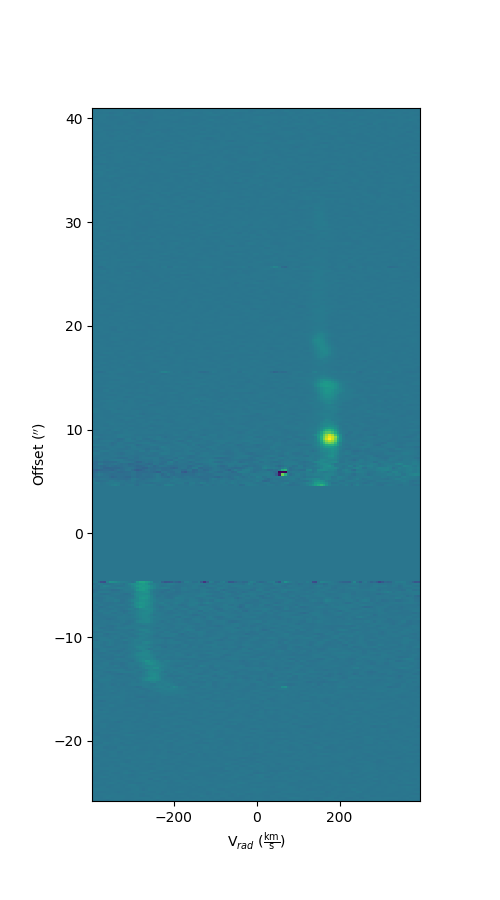

In [84]:
%matplotlib notebook

pv2.plot(scale = 'linear', imshow_kws = {'aspect' : 25})

In [34]:
pv2.world.pix2offset(40, unit = pv2.world.spatial_unit)

-17.3